# HLA Molecular Simulation

Binding slot of MHC molecule. Two disparate alpha helices in red seperated by ~ 13-17 Aº, and beta sheet underneath in green roughly ~ 13-17 Aº under alpha helices. Amino acids in peptide chain roughly 3.5 Aº. 

![](https://i.ibb.co/pydVr3P/HLA-B-35-01.png)

### HLA search function for specific alleles

In [1]:
import csv

def Allele2AAseq(Allele_entry):
    global AAseq
    
    Allele_read = Allele_entry; Allele_read1 = Allele_read; Allele_read2 = Allele_read
    
    ColNum = Allele_read.count(':') # distinguishes between short and long form by : seperators present
            
    if ColNum <= 2:
        if ColNum == 1:
            Allele_read1 = "".join([Allele_read, ":01"]) # assumes short version is short hand for longer i.e HLA-A*01:01 is HLA-A*01:01:01
            Allele_read2 = "".join([Allele_read, ":01:01"]) # assumes short version is short hand for longer i.e HLA-A*01:01 is HLA-A*01:01:01:01
        elif ColNum == 2:
            Allele_read2 = "".join([Allele_read, ":01"]) # assumes short version is short hand for longer i.e HLA-A*01:01:01 is HLA-A*01:01:01:01
    
    with open ('MHC_interest.csv', 'r') as csv_file:
        csvread = csv.reader(csv_file, delimiter=' ')
        
        for row in csvread:
            
            if Allele_read == row[0] or Allele_read1 == row[0] or Allele_read2 == row[0]: #matched entered allele with stored allele, made arguments more lenient 
            
                print(Allele_entry) # print allele
                AAseq = (row[1])
                print(AAseq) # print AAseq

### HLA Allele name and amino acid sequence 

In [2]:
Allele_entry = 'HLA-A*31:01' # enter allele of interest here                
Allele2AAseq(Allele_entry)

HLA-A*31:01
MAVMAPRTLLLLLLGALALTQTWAGSHSMRYFTTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQERPEYWDQETRNVKAHSQIDRVDLGTLRGYYNQSEAGSHTIQMMYGCDVGSDGRFLRGYQQDAYDGKDYIALNEDLRSWTAADMAAQITQRKWEAARVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDPPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWASVVVPSGQEQRYTCHVQHEGLPKPLTLRWEPSSQPTIPIVGIIAGLVLFGAVFAGAVVAAVRWRRKSSDRKGGSYSQAASSDSAQGSDMSLTACKV


### Import BioPython package for sequence allignment and initialize refrence sequences to identify start sites and alpha helices sites

In [3]:
from Bio import pairwise2
from Bio.Seq import Seq 
from Bio.SubsMat.MatrixInfo import blosum62

Pseudo_res = [6,8,23,44,58,61,62,65,66,68,69,72,73,75,76,79,80,83,94,96,98,113,115,117,142,146,149,151,155,157,158,162,166,170] #residue sites
Pseudo_res_HelixOnly = [58,61,62,65,66,68,69,72,73,75,76,79,80,83,142,146,149,151,155,157,158,162,166,170] #residue sites for only helices

seq1 = Seq(AAseq)
seq2 = Seq("PWIEQEGPEYWDRNTQIFKTNTQTYRESLRNLRG") # Refrence sequnece helix 1 for B:35:01 isoform AAseq[73:107] 
seq3 = Seq("AQITQRKWEAARVAEQLRAYLEGLCVEWLRRYLENGKET") # Refrence sequnece helix 2 for B:35:01 isoform AAseq[163:202]
trimseq = Seq("GSHSMR") # crystal sequences start ~ 24 AAs ahead beta for B:35:01 isoform AAseq[24:]

### Identifying helix sequence function using allignment with known allele B:35:01 structure

In [4]:
def AAseq2Helixseq(seq_full,seq_helix,AAseq):
    
    global AAseq_helix; global alignment_helix 
    
    alignment_helix = pairwise2.align.localds(seq_full, seq_helix, blosum62, -10, -0.5) # alpha helix 2 sequence for HLA of interest
    for alignment in alignment_helix:
        print(pairwise2.format_alignment(*alignment_helix[0]))
        
    alignment_helix = list(sum(alignment_helix, ()))
    Helix_start = (len(seq_helix)-(alignment_helix[4] - alignment_helix[3])) # alignment starts and ends on matches only
    
    if Helix_start > 0:
        for i in range(len(seq_helix)):
            if AAseq[alignment_helix[3]] == seq_helix[i]:
                AAseq_helix = AAseq[alignment_helix[3] - i : alignment_helix[4] + Helix_start - i] # allignment adjustments
                break

    else:
        AAseq_helix = AAseq[alignment_helix[3]:alignment_helix[4]] # perfect allignment case

### Helix sequence generation

In [5]:
AAseq2Helixseq(seq1,seq2,AAseq)
AAseq_a1 = AAseq_helix; alignment_a1 = alignment_helix # alpha helix 1 sequence for HLA of interest  

print("AAseq_a1 = " + AAseq_a1)
print(" ")
    
AAseq2Helixseq(seq1,seq3,AAseq)
AAseq_a2 = AAseq_helix; alignment_a2 = alignment_helix # alpha helix 2 sequence for HLA of interest

print("AAseq_a2 = " + AAseq_a2)
print(" ")
                
G_link = "G" * 10 # G linker length is 10
X_link = "X" * 10
AAseq_a1_a2_wG = AAseq_a1 + G_link + AAseq_a2 # alpha helices linked w g linker
AAseq_a1_a2_wX = AAseq_a1 + X_link + AAseq_a2
print("AAseq_a1_a2_wG = " + AAseq_a1_a2_wG )  

74 PWIEQERPEYWDQETRNVKAHSQIDRVDLGTLRG
   ||||||.|||||..|...|...|..|..|..|||
 1 PWIEQEGPEYWDRNTQIFKTNTQTYRESLRNLRG
  Score=102

AAseq_a1 = PWIEQERPEYWDQETRNVKAHSQIDRVDLGTLRG
 
164 AQITQRKWEAARVAEQLRAYLEGTCVEWLRRYLENGKET
    |||||||||||||||||||||||.|||||||||||||||
  1 AQITQRKWEAARVAEQLRAYLEGLCVEWLRRYLENGKET
  Score=200

AAseq_a2 = AQITQRKWEAARVAEQLRAYLEGTCVEWLRRYLENGKET
 
AAseq_a1_a2_wG = PWIEQERPEYWDQETRNVKAHSQIDRVDLGTLRGGGGGGGGGGGAQITQRKWEAARVAEQLRAYLEGTCVEWLRRYLENGKET


### Identifying sequence start site for beta sheet

In [6]:
alignment_start = pairwise2.align.localds(seq1, trimseq, blosum62, -10, -0.5) # start sequence for HLA of interest
for alignment in alignment_start:
    print(pairwise2.format_alignment(*alignment_start[0]))
    
alignment_start = list(sum(alignment_start, ())) # full pseudo allignemnt (same as crystal peptide start)
AAseq_b_a1_a2 = AAseq[alignment_start[3]:alignment_a2[4]] # start to end full sequence
print("AAseq_b_a1_a2 = " + AAseq_b_a1_a2)

25 GSHSMR
   ||||||
 1 GSHSMR
  Score=32

AAseq_b_a1_a2 = GSHSMRYFTTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQERPEYWDQETRNVKAHSQIDRVDLGTLRGYYNQSEAGSHTIQMMYGCDVGSDGRFLRGYQQDAYDGKDYIALNEDLRSWTAADMAAQITQRKWEAARVAEQLRAYLEGTCVEWLRRYLENGKET


### Pseudo sequence generation function using known contact residue sites

In [7]:
def AAseq2ResidueAAs(ResidueSites,AAseq_b_a1_a2):
    
    global ResAAs; global ResAAs_wG; global ResAAs_wX
    ResAAs = ""; ResAAs_wG = "" ; ResAAs_wX = ""
    
    ResPos = 0 # initialization of residue positiion
    G_num = 0 # initialization of G addition in vacant positiion
    
    for i in range(len(ResidueSites)):
        ResAAs = ResAAs + AAseq_b_a1_a2[ResidueSites[i]] # concatenated pseudo sequence for residue positions
    
    for i in range(len(AAseq_b_a1_a2)): # pseudo sequence for residue positions W/ G linkers
        if i == ResidueSites[ResPos]: 
            ResAAs_wG = ResAAs_wG + AAseq_b_a1_a2[ResidueSites[ResPos]]
            ResAAs_wX = ResAAs_wX + AAseq_b_a1_a2[ResidueSites[ResPos]]
            if ResPos < len(ResidueSites) - 1: 
                ResPos = ResPos+1
                G_num = 0
            else:
                break
        elif ResPos > 0 and G_num < 3: # G linker length is 3
            ResAAs_wG = ResAAs_wG + "G"; ResAAs_wX = ResAAs_wX + "X"
            G_num = G_num + 1

### Generation of pseudo sequences of interest

In [8]:
AAseq2ResidueAAs(Pseudo_res,AAseq_b_a1_a2)
AAseq_pseudo = ResAAs; AAseq_pseudo_wG = ResAAs_wG; AAseq_pseudo_wX = ResAAs_wX

print("AAseq_pseudo = " + AAseq_pseudo); print(" ") # pseudo sequence for residue positions
print("AAseq_pseudo_wG = " + AAseq_pseudo_wG); print(" ") # pseudo sequence for residue positions w/ g linker

AAseq2ResidueAAs(Pseudo_res_HelixOnly,AAseq_b_a1_a2)
AAseq_pseudo_HelixOnly = ResAAs; AAseq_pseudo_HelixOnly_wG = ResAAs_wG; AAseq_pseudo_HelixOnly_wX = ResAAs_wX

print("AAseq_pseudo_HelixOnly = " + AAseq_pseudo_HelixOnly); print(" ") # pseudo sequence for residue positions at alpha helices only
print("AAseq_pseudo_HelixOnly_wG = " + AAseq_pseudo_HelixOnly_wG) # pseudo sequence for residue positions at alpha helices only w/ g linker

AAseq_pseudo = YTAMYQENVAHIDVDTLYIMYQDYTWAVLAYTWY
 
AAseq_pseudo_wG = YGTGGGAGGGMGGGYGGQEGGNVGAHGGIDGVDGGTLGGYGGGIGMGYGGGQGDGYGGGTGGGWGGAGVGGGLGAYGGGTGGGWGGGY
 
AAseq_pseudo_HelixOnly = YQENVAHIDVDTLYTWAVLAYTWY
 
AAseq_pseudo_HelixOnly_wG = YGGQEGGNVGAHGGIDGVDGGTLGGYGGGTGGGWGGAGVGGGLGAYGGGTGGGWGGGY


### Storing generated sequences for alllele of interest in dataset list

In [9]:
HLA_Mol_dataset = [Allele_entry,AAseq,AAseq_a1,AAseq_a2,AAseq_a1_a2_wG,AAseq_b_a1_a2,
                   AAseq_pseudo,AAseq_pseudo_wG,AAseq_pseudo_HelixOnly,AAseq_pseudo_HelixOnly_wG]

HLA_Seq_dataset = [Allele_entry,AAseq,AAseq_a1,AAseq_a2,AAseq_a1_a2_wX,AAseq_b_a1_a2,
                   AAseq_pseudo,AAseq_pseudo_wX,AAseq_pseudo_HelixOnly,AAseq_pseudo_HelixOnly_wX]

### Testing out various RDkit MolSim tools and outputs

In [10]:
from rdkit import Chem

# mol = Chem.MolFromSequence(AAseq)
# print(HLA_dataset[1])
# mol

RDKit WARNING: [10:31:04] Enabling RDKit 2019.09.3 jupyter extensions


PWIEQERPEYWDQETRNVKAHSQIDRVDLGTLRG


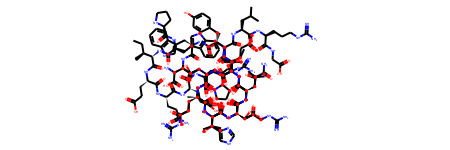

In [11]:
mol = Chem.MolFromSequence(AAseq_a1)
print(HLA_Mol_dataset[2])
mol

AQITQRKWEAARVAEQLRAYLEGTCVEWLRRYLENGKET


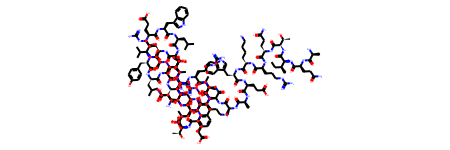

In [12]:
mol = Chem.MolFromSequence(AAseq_a2)
print(HLA_Mol_dataset[3])
mol

PWIEQERPEYWDQETRNVKAHSQIDRVDLGTLRGGGGGGGGGGGAQITQRKWEAARVAEQLRAYLEGTCVEWLRRYLENGKET


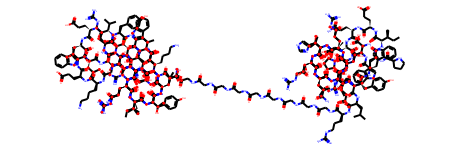

In [13]:
mol = Chem.MolFromSequence(AAseq_a1_a2_wG)
print(HLA_Mol_dataset[4])
mol

GSHSMRYFTTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQERPEYWDQETRNVKAHSQIDRVDLGTLRGYYNQSEAGSHTIQMMYGCDVGSDGRFLRGYQQDAYDGKDYIALNEDLRSWTAADMAAQITQRKWEAARVAEQLRAYLEGTCVEWLRRYLENGKET


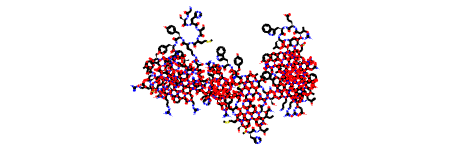

In [14]:
mol = Chem.MolFromSequence(AAseq_b_a1_a2)
print(HLA_Mol_dataset[5])
mol

YTAMYQENVAHIDVDTLYIMYQDYTWAVLAYTWY


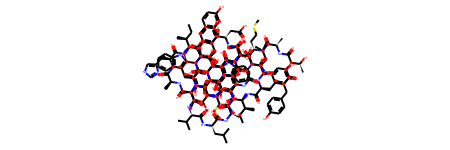

In [15]:
mol = Chem.MolFromSequence(AAseq_pseudo)
print(HLA_Mol_dataset[6])
mol

YGTGGGAGGGMGGGYGGQEGGNVGAHGGIDGVDGGTLGGYGGGIGMGYGGGQGDGYGGGTGGGWGGAGVGGGLGAYGGGTGGGWGGGY


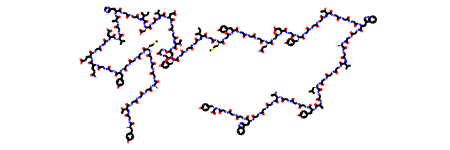

In [16]:
mol = Chem.MolFromSequence(AAseq_pseudo_wG)
print(HLA_Mol_dataset[7])
mol

YQENVAHIDVDTLYTWAVLAYTWY


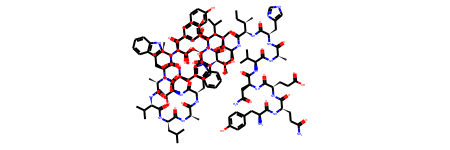

In [17]:
mol = Chem.MolFromSequence(AAseq_pseudo_HelixOnly)
print(HLA_Mol_dataset[8])
mol

YGGQEGGNVGAHGGIDGVDGGTLGGYGGGTGGGWGGAGVGGGLGAYGGGTGGGWGGGY


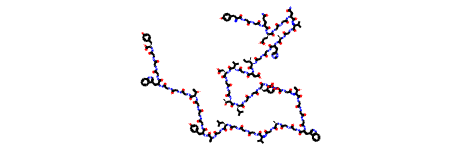

In [18]:
mol = Chem.MolFromSequence(AAseq_pseudo_HelixOnly_wG)
print(HLA_Mol_dataset[9])
mol

In [19]:
for i in range (len(HLA_Mol_dataset)-1):
    HLA_Mol_dataset[i+1] = Chem.MolFromSequence(HLA_Mol_dataset[i+1])